In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

# Reading data

In [3]:
dataset=pd.read_csv("data.csv")

In [4]:
dataset.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [5]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
dataset.shape

(863, 14)

In [7]:
x_data=dataset[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos']]
x_data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0


In [8]:
y_data=dataset[['result']]
y_data

,result
0,1
1,0
2,0
3,0
4,0
...,...
858,1
859,0
860,0
861,0


In [9]:
labels=['0-20', '20-40', '40-60', '60+']
bins=[0,20,40,60,float('inf')]

In [10]:
df = pd.DataFrame({})

In [11]:
df['age_groups']=pd.cut(dataset['age'],bins=bins,labels=['0-20', '20-40', '40-60', '60+'])

Text(0.5, 1.0, 'age groups bins')

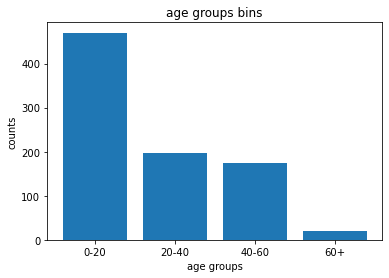

In [12]:
plt.bar(labels,df['age_groups'].value_counts())
plt.xlabel("age groups")
plt.ylabel("counts")
plt.title("age groups bins")

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
x_data=scaler.fit_transform(x_data)

In [16]:
x_data=pd.DataFrame(x_data)

In [17]:
x_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.698221,-1.15245,0.207592,1.101492,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,2.971339
1,0.621646,-1.15245,-1.170499,0.437943,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,1.540540,-1.15245,0.207592,-0.225607,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.092319
3,1.004519,-1.15245,-1.170499,0.703363,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
4,1.004519,-1.15245,0.207592,0.570653,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [18]:
x_data.columns=['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos']

In [19]:
x_data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,0.698221,-1.15245,0.207592,1.101492,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,2.971339
1,0.621646,-1.15245,-1.170499,0.437943,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,1.540540,-1.15245,0.207592,-0.225607,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.092319
3,1.004519,-1.15245,-1.170499,0.703363,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
4,1.004519,-1.15245,0.207592,0.570653,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=None)

In [28]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.25,random_state=None)

In [29]:
x_train.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
10,-1.624538,-1.152450,-1.170499,-2.083546,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,0.001966
669,-0.807744,-0.511870,0.207592,-0.690092,-0.471571,2.877424,-1.536471,0.401355,0.244914,0.135161,0.054668,0.03406,0.001966
424,0.800320,0.897406,-1.170499,0.305233,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
340,-1.139567,0.128710,-1.170499,0.371588,-0.471571,-0.347533,2.467981,-3.079746,0.244914,0.135161,0.054668,0.03406,0.850358
809,-1.828737,1.025522,-1.170499,-1.619061,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [30]:
x_val.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
705,-0.807744,-0.511870,-1.170499,0.902427,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,0.001966
722,-0.807744,-0.511870,0.207592,1.300557,-0.471571,-0.347533,-2.537584,-0.401976,0.244914,0.135161,0.054668,0.03406,-0.422230
599,-1.650063,-0.639986,1.585683,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
840,-1.701113,-1.664914,1.585683,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
552,0.953469,1.537986,0.207592,-1.619061,-0.471571,-0.347533,-1.536471,-2.811969,0.244914,0.135161,0.054668,0.03406,-0.422230


In [31]:
y_test.head()

,result
151,0
445,0
191,0
102,0
697,0


In [32]:
x_test.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
151,0.570597,-1.152450,0.207592,-0.690092,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
445,0.800320,0.897406,-1.170499,0.437943,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
191,1.030044,0.128710,-1.170499,-0.955511,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,0.426162
102,1.489490,-1.152450,-1.170499,-1.154576,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
697,-0.807744,-0.511870,-1.170499,0.106168,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [33]:
print(x_test.shape)
print(x_train.shape)
print(x_val.shape)

(173, 13)
(517, 13)
(173, 13)


In [34]:
dataset.describe(include="all")

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [35]:
import seaborn as sns

<AxesSubplot:>

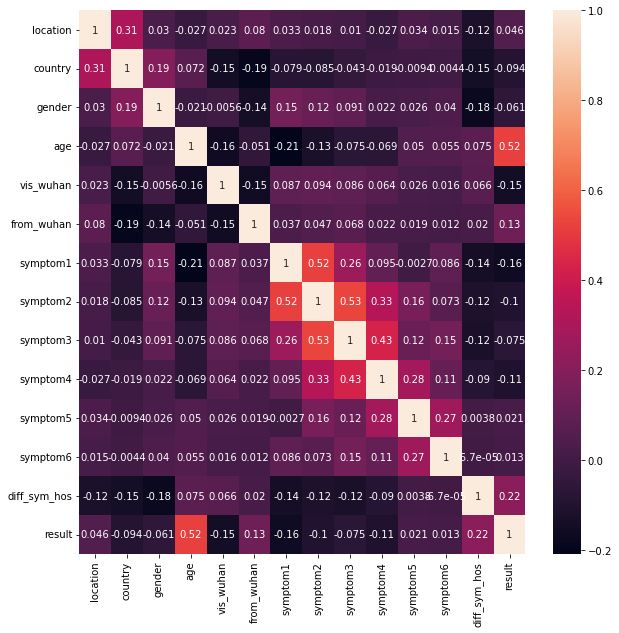

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, ax=ax)

# SVM

In [37]:
from sklearn import svm

In [38]:
from sklearn.metrics import roc_curve, auc

In [39]:
from sklearn.metrics import classification_report


### polynomial kernel

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

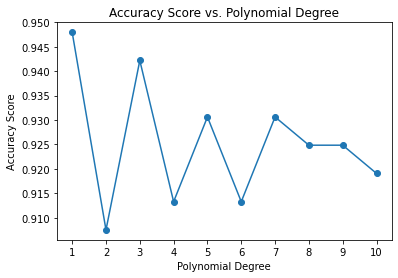

In [40]:
c=[1,2,3,4,5,6,7,8,9,10]
degrees=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for poly in degrees:
    model=svm.SVC(kernel="poly",degree=poly)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
plt.plot(degrees, scores, '-o')
plt.title('Accuracy Score vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy Score')
plt.xticks(degrees)
plt.show()

In [41]:
c=[1,2,3,4,5,6,7,8,9,10,11,12]
degrees=[1,2,3,4,5,6,7,8,9,10]
max_score=0
for degree in degrees:
    for constant in c:
        model=svm.SVC(kernel="poly",degree=degree,C=constant)
        model.fit(x_train,y_train)
        score=model.score(x_val,y_val)
        if (score>max_score):  
            max_score=score
            max_degree=degree
            max_c=constant
print("use: ",max_degree,max_c)

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

use:  3 6


/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [42]:
model=svm.SVC(kernel="poly",degree=3,C=6)
model.fit(x_train,y_train)
model.score(x_val,y_val)

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.976878612716763

In [43]:
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.90      0.67      0.77        27

    accuracy                           0.94       173
   macro avg       0.92      0.83      0.86       173
weighted avg       0.93      0.94      0.93       173



In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

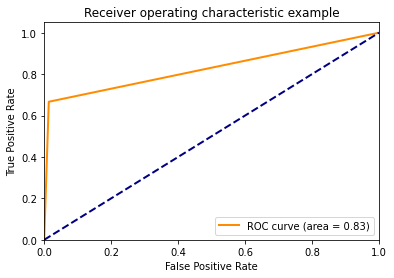

In [45]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

### rbf kernel

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

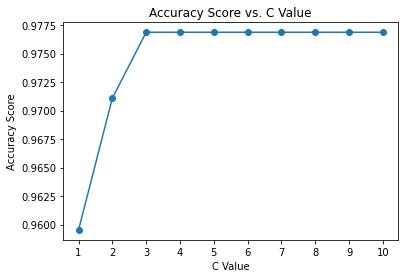

In [48]:
c=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for constant in c:
    model=svm.SVC(kernel="rbf",C=constant)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
plt.plot(c, scores, '-o')
plt.title('Accuracy Score vs. C Value')
plt.xlabel('C Value')
plt.ylabel('Accuracy Score')
plt.xticks(c)
plt.show()

In [49]:
model=svm.SVC(kernel="rbf",C=3)
model.fit(x_train,y_train)
model.score(x_val,y_val)

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.976878612716763

In [50]:
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       146
           1       0.86      0.70      0.78        27

    accuracy                           0.94       173
   macro avg       0.91      0.84      0.87       173
weighted avg       0.93      0.94      0.93       173



In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

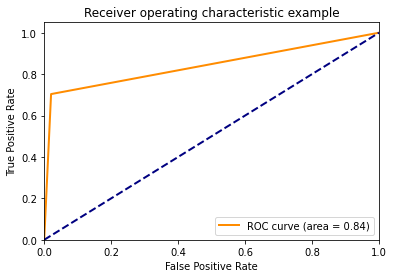

In [52]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# Bayes 

In [53]:
from sklearn.naive_bayes import GaussianNB

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

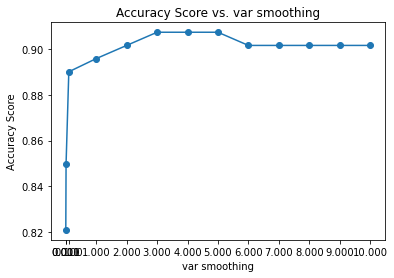

<Figure size 720x720 with 0 Axes>

3
0.9075144508670521


In [56]:
var_smoothing=[0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10]
scores=[]
max_score=0
for var in var_smoothing:
    model= GaussianNB(var_smoothing=var)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
    if (score>max_score):
        max_score=score
        max_var=var
plt.plot(var_smoothing, scores, '-o')
plt.title('Accuracy Score vs. var smoothing')
plt.xlabel('var smoothing')
plt.ylabel('Accuracy Score')
plt.xticks(var_smoothing)
plt.figure(figsize=(10, 10))
plt.show()

print(max_var)
print(max_score)

In [57]:
model=GaussianNB(var_smoothing=3)
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.9075144508670521
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       146
           1       0.50      0.04      0.07        27

    accuracy                           0.84       173
   macro avg       0.67      0.52      0.49       173
weighted avg       0.79      0.84      0.78       173



/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


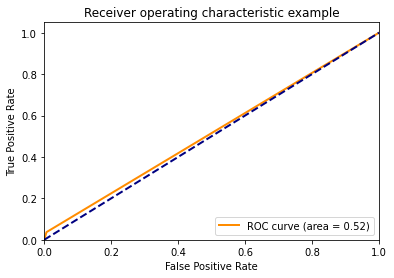

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [59]:
model=GaussianNB(var_smoothing=0.01)
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.8497109826589595
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       146
           1       0.51      0.78      0.62        27

    accuracy                           0.85       173
   macro avg       0.73      0.82      0.76       173
weighted avg       0.89      0.85      0.86       173



/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


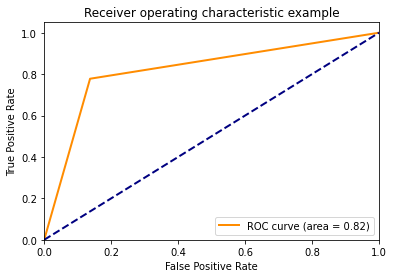

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
grid_parameters={
    "var_smoothing":[1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01,1]
}

In [63]:
model=GaussianNB()
grid_search=GridSearchCV(model,grid_parameters)
grid_search.fit(x_train,y_train)
print(grid_search.best_estimator_)

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

GaussianNB(var_smoothing=1)


/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
GaussianNB(var_smoothing=1)
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.31213872832369943
              precision    recall  f1-score   support

           0       0.97      0.22      0.36       146
           1       0.19      0.96      0.31        27

    accuracy                           0.34       173
   macro avg       0.58      0.59      0.33       173
weighted avg       0.85      0.34      0.35       173



/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

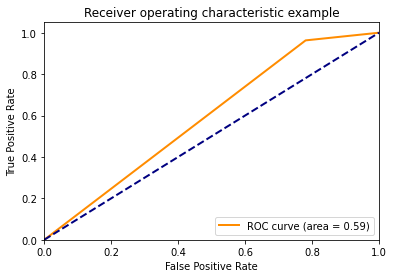

In [66]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

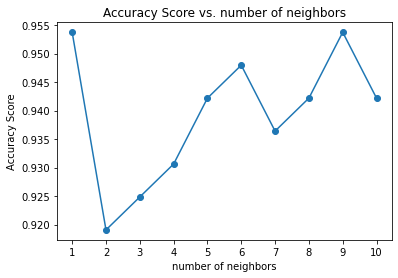

In [68]:
neighbors=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for n in neighbors:
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
plt.plot(neighbors, scores, '-o')
plt.title('Accuracy Score vs. number of neighbors')
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy Score')
plt.xticks(neighbors)
plt.show()

In [69]:
neighbors=[1,2,3,4,5,6,7,8,9,10]
leaf_size=[1,10,20,30,40]
metric=['minkowski','euclidean','manhattan','chebyshev']
scores=[]
max_score=0
for n in neighbors:
    for l in leaf_size:
        for m in metric:
            model=KNeighborsClassifier(n_neighbors=n , leaf_size=l, metric=m)
            model.fit(x_train,y_train)
            score=model.score(x_val,y_val)
            scores.append(score)
            if (score>max_score):
                max_score=score
                max_neighbors=n
                max_leafsize=l
                best_metric=m
print(max_score)
print(max_neighbors)
print(max_leafsize)
print(best_metric)

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

0.9653179190751445
1
1
chebyshev


/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [70]:
model=KNeighborsClassifier(n_neighbors=1 , leaf_size=1, metric='chebyshev')
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.9653179190751445
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.89      0.63      0.74        27

    accuracy                           0.93       173
   macro avg       0.91      0.81      0.85       173
weighted avg       0.93      0.93      0.93       173



/Users/karim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


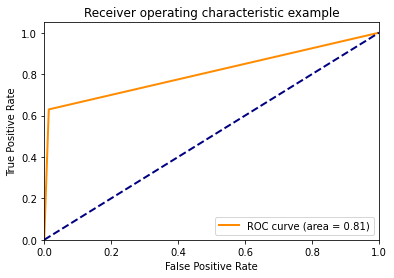

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")